# Initial Hamming Weight experiment

With brute-force hyper parameter optimization of the MLP.

In [19]:
import numpy as np
import seaborn as sns
from scipy.stats import beta
from tqdm import tqdm

from src.tools.plotter import init_plots
from src.trace_set.database import Database
from src.trace_set.set_hw import TraceSetHW
from src.trace_set.transform import fixed_fixed
from src.tvla.cri import tvla_cri

init_plots()

In [3]:
DB = Database.ascad
TRACE_SET = TraceSetHW(DB)

In [16]:
def get_corr(trace_set):
    traces, labels = trace_set.profile_states()
    sample_points = np.transpose(traces)
    num_sample_points = len(sample_points)

    res_01 = np.zeros(num_sample_points, dtype=np.float64)
    for ix in tqdm(range(num_sample_points)):
        res_01[ix] = np.corrcoef(sample_points[ix], labels)[0, 1]

    return np.array(res_01)

CORR = get_corr(TRACE_SET)

100%|██████████| 1400/1400 [00:03<00:00, 407.20it/s]


In [22]:
TVLA = tvla_cri(*fixed_fixed(*TRACE_SET.profile()), max_order=2, progress=True)

Computing Central Moments: 100%|██████████| 4/4 [00:01<00:00,  3.36it/s]


In [17]:
NUM_TRACES = 200000
DIST = beta(NUM_TRACES/2 - 1, NUM_TRACES/2 - 1, loc=-1, scale=2)
CORR_P = 2 * DIST.cdf(-np.abs(CORR))

[None, (1, 1e-10)]

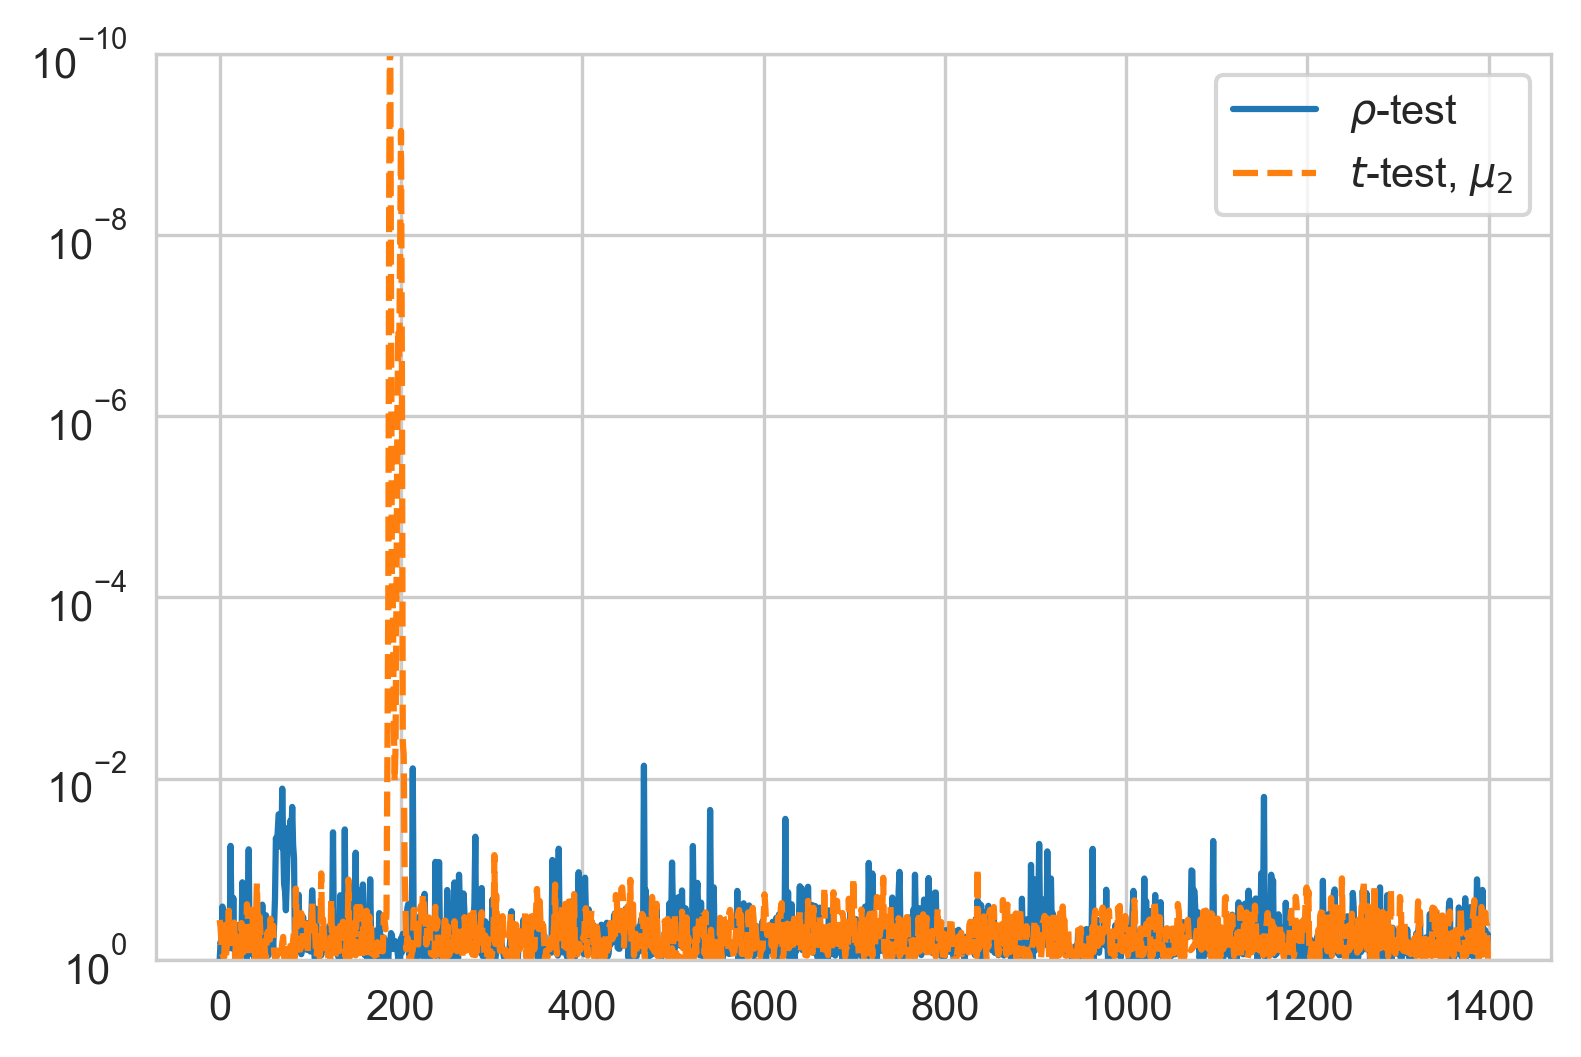

In [23]:
G = sns.lineplot(data={"$\\rho$-test": CORR_P, "$t$-test, $\mu_2$": TVLA[2]})

G.set(yscale="log", ylim=(1, 10 ** -10))